## Exploratory Data Analysis using Python - A Case Study


## Introduction

**We'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here [StackOverflow](https://insights.stackoverflow.com/survey).**

**There are several options for getting the dataset into Jupyter:**

- **Download the CSV manually and upload it via Jupyter's GUI**
- **Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL**

**Here, we'll download the data from [StackOverflow](https://insights.stackoverflow.com/survey) manually and upload it to jupyter.**

In [1]:
import os

In [2]:
os.listdir('stack-overflow-developer-survey-2022')

['README_2022.txt',
 'so_survey_2022.pdf',
 'survey_results_public.csv',
 'survey_results_schema.csv']

**The `stack-overflow-developer-survey-2022` contains four files:**
- **`README_2022.txt`: This is a text file with information about the survey.**
- **`so_survey_2022.pdf`: This is a PDF file of the survey instrument.**
- **`survey_results_public.csv`: This is a CSV file with main survey results, one respondent per row and one column per answer.**
- **`survey_results_schema.csv`: This is also a CSV file with survey schema, i.e., the questions that correspond to each column name.**

**We load the csv files using Pandas library. We'll call the loaded files `survey_raw_df` and `schema_raw` for the `survey_results_public.csv` and `survey_results_schema.csv` respectively into data frames to indicate there are unprocessed data that we'll clean, filter and modify for analysis.**

In [3]:
import pandas as pd

In [4]:
survey_raw_df = pd.read_csv('stack-overflow-developer-survey-2022/survey_results_public.csv')

In [5]:
survey_raw_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73264,73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73265,73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN
73266,73267,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN


**The dataset above contains `73268` rows and `79` columns.**

In [6]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [7]:
schema_fname = 'stack-overflow-developer-survey-2022/survey_results_schema.csv'

**`schema` can be use to get the full question text for any column in `survey_raw_df`.**

In [8]:
schema_raw = pd.read_csv(schema_fname, index_col='qname').question

schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [9]:
schema_raw.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [10]:
schema_raw.Language

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

**Looking at some questions in `schema`, we can see some `HTML` tags in some question. Let's remove the `HTML` tags by using a library in python called `BeautifulSoup`.**

**We'll import the `BeautifulSoup` and also define a function called `remove_html_tags` for the removal of the tags from our `series`.**

In [11]:
from bs4 import BeautifulSoup

In [12]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [13]:
schema_raw = schema_raw.apply(remove_html_tags)

In [14]:
schema_raw.Country

'Where do you live? *'

In [15]:
schema_raw.Language

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

**Our dataset have been loaded succefully. We can now move to the next step of preprocessing & cleaning the data for analysis.**

## Data Preparation and Cleaning

**We'll limit our analysis to the following areas:**

- Demographics of the survey respondents and the programming community
- Distribution of programming skills, experiences and preferences
- Employment-related information, preferences and opinions

**There are variations with the column names both in `survey_raw_df` and `schema_raw`. Some questions have two responses to them, which causes some differences in the column names in the data frames. For example, in `schema_raw`, we have a column named `Language` asking a question about pragramming languages, while in `survey_raw_df`, we have two columns `LanguageHaveWorkedWith` and `LanguageWantToWorkWith` responding to the question.**

**For the about reason, we'll create two subsets of columns with relevant data for our analysis.**

In [16]:
# selected_columns for survey_raw_df
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'Ethnicity',
    'Trans',
    # Programming experience
    'CodingActivities',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert', 
    'YearsCode', 
    'YearsCodePro', 
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith', 
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    # Employment
    'Employment', 
    'RemoteWork',
    'OrgSize',
    'DevType',
    'CompTotal',
    'CompFreq'
]

# selected_columns1 for schema_raw
selected_columns1 = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'Ethnicity',
    'Trans',
    # Programming experience
    'CodingActivities',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert', 
    'YearsCode', 
    'YearsCodePro', 
    'Language',
    'Database',
    # Employment
    'Employment', 
    'RemoteWork',
    'OrgSize',
    'DevType',
    'CompTotal',
    'CompFreq'
]

In [17]:
len(selected_columns)

22

In [18]:
len(selected_columns1)

20

**Now we can extract a copy of the data from these columns into two new data frames `survey_df` and `schema`. We can continue to modify further without affecting the original data frames.**

In [19]:
survey_df = survey_raw_df[selected_columns].copy()

In [20]:
schema = schema_raw[selected_columns1].copy()

In [21]:
survey_df

,Country,Age,Gender,EdLevel,Ethnicity,Trans,CodingActivities,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,Employment,RemoteWork,OrgSize,DevType,CompTotal,CompFreq
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN,NaN,NaN,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,"Employed, full-time",Fully remote,NaN,NaN,NaN,NaN
2,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White,No,Hobby,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,...,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,"Employed, full-time","Hybrid (some remote, some in-person)",20 to 99 employees,Data scientist or machine learning specialist;...,32000.0,Yearly
3,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White,No,I don’t code outside of work,"Books / Physical media;School (i.e., Universit...",NaN,NaN,...,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,"Employed, full-time",Fully remote,100 to 499 employees,"Developer, full-stack",60000.0,Monthly
4,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,NaN,Hobby,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,...,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...,"Employed, full-time","Hybrid (some remote, some in-person)",20 to 99 employees,"Developer, front-end;Developer, full-stack;Dev...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",African,No,Freelance/contract work,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,...,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Elasticsearch;MySQL;PostgreSQL;Redis,MySQL;PostgreSQL;Redis,"Employed, full-time",Fully remote,100 to 499 employees,"Developer, back-end",60000.0,Yearly
73264,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White,No,Hobby,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,...,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Elasticsearch;MongoDB;Oracle;SQLite,Elasticsearch;Neo4j;SQLite,"Employed, full-time",Full in-person,I don’t know,Data scientist or machine learning specialist,107000.0,Yearly
73265,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Multiracial,No,Hobby;School or academic work,Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,...,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,"Employed, full-time","Hybrid (some remote, some in-person)",20 to 99 employees,"Developer, full-stack;Developer, desktop or en...",NaN,NaN
73266,United Kingdom of Great Britain and Northern I...,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",European,No,Hobby,Books / Physical media;On the job training,NaN,NaN,...,C#;Delphi;VBA,Delphi,Microsoft SQL Server;MongoDB;Oracle,NaN,"Employed, full-time","Hybrid (some remote, some in-person)",10 to 19 employees,"Developer, front-end;Developer, desktop or ent...",58500.0,Yearly


In [22]:
schema

qname
Country                                              Where do you live? *
Age                                                     What is your age?
Gender                  Which of the following describe you, if any? P...
EdLevel                 Which of the following best describes the high...
Ethnicity               Which of the following describe you, if any? P...
Trans                                     Do you identify as transgender?
CodingActivities        Which of the following best describes the code...
LearnCode               How did you learn to code? Select all that apply.
LearnCodeOnline         What online resources do you use to learn to c...
LearnCodeCoursesCert    What online courses or certifications do you u...
YearsCode               Including any education, how many years have y...
YearsCodePro            NOT including education, how many years have y...
Language                Which programming, scripting, and markup langu...
Database                Which da

**Let's view some basic information about the data frames.**

In [23]:
survey_df.shape

(73268, 22)

In [24]:
schema.shape

(20,)

In [25]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   Ethnicity               69474 non-null  object 
 5   Trans                   70315 non-null  object 
 6   CodingActivities        58899 non-null  object 
 7   LearnCode               71580 non-null  object 
 8   LearnCodeOnline         50685 non-null  object 
 9   LearnCodeCoursesCert    29389 non-null  object 
 10  YearsCode               71331 non-null  object 
 11  YearsCodePro            51833 non-null  object 
 12  LanguageHaveWorkedWith  70975 non-null  object 
 13  LanguageWantToWorkWith  67027 non-null  object 
 14  DatabaseHaveWorkedWith  60121 non-null

**Most columns have the data type `object`, this because they contain values of different types or contain empty value(`NaN`). Every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (73268). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.**

**Only one column is detected as numeric column(`CompTotal`), although two other columns have mostly numeric values. To make our analysis simple and easy, we'll convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric value are converted to `NaN`.**

**In `survey_df`, we also have two columns that have mostly numeric values, they are:**
- `YearsCode`
- `YearsCodePro`

In [26]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [27]:
survey_df.YearsCode.unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [28]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [29]:
survey_df.YearsCodePro.unique()

array([nan, '5', '17', '3', '6', '30', '2', '10', '15', '4', '22', '20',
       '40', '9', '14', '21', '7', '18', '25', '8', '12', '45', '1', '19',
       '28', '24', '11', '23', 'Less than 1 year', '32', '27', '16', '44',
       '26', '37', '46', '13', '31', '39', '34', '38', '35', '29', '42',
       '36', '33', '43', '41', '48', '50', 'More than 50 years', '47',
       '49'], dtype=object)

In [30]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

**We used the `to_numeric` fuction of Pandas to convert the `YearsCode` and `YearsCodePro` columns to numeric columns.**

**Let's see if the changes where effected below;**

In [31]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   Ethnicity               69474 non-null  object 
 5   Trans                   70315 non-null  object 
 6   CodingActivities        58899 non-null  object 
 7   LearnCode               71580 non-null  object 
 8   LearnCodeOnline         50685 non-null  object 
 9   LearnCodeCoursesCert    29389 non-null  object 
 10  YearsCode               69746 non-null  float64
 11  YearsCodePro            49820 non-null  float64
 12  LanguageHaveWorkedWith  70975 non-null  object 
 13  LanguageWantToWorkWith  67027 non-null  object 
 14  DatabaseHaveWorkedWith  60121 non-null

**Let's view basic statistics about the numeric columns.**

In [32]:
survey_df.describe()

,YearsCode,YearsCodePro,CompTotal
count,69746.000000,49820.000000,3.842200e+04
mean,12.403951,10.268727,2.342434e+52
std,9.722896,8.576772,4.591478e+54
min,1.000000,1.000000,0.000000e+00
25%,5.000000,4.000000,3.000000e+04
50%,10.000000,8.000000,7.750000e+04
75%,17.000000,15.000000,1.540000e+05
max,50.000000,50.000000,9.000000e+56


**There seem to be a problem with the `CompTotal` column, as the minimum value is 0. It is a common issue with surveys, sometimes due to accidental or intentioal errors, invalid values might be recorded while answering questions.**

**Let's get the `question` in `schema` series.**

In [33]:
schema.CompTotal

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

**The `CompTotal` column is about the total compensation (salary, bonuses, and perks, before taxes and deductions), nobody is expected to earn `0.00` as compensation. After an extensive online reseach, we use the US average of salary of developers of `$40` per hour and average of 40 hours of work per week.**

**To solve the problem, we drop rows where the `CompTotal` is less than `1600`. We'll use the `.drop` method.**

In [34]:
survey_df.drop(survey_df[survey_df.CompTotal < 1600].index, inplace=True)

In [35]:
survey_df.describe()

,YearsCode,YearsCodePro,CompTotal
count,68492.000000,48715.000000,3.714400e+04
mean,12.447322,10.348599,2.423029e+52
std,9.737418,8.576802,4.669799e+54
min,1.000000,1.000000,1.600000e+03
25%,5.000000,4.000000,3.500000e+04
50%,10.000000,8.000000,8.000000e+04
75%,17.000000,15.000000,1.600000e+05
max,50.000000,50.000000,9.000000e+56


**Let's view some columns to understand our data and try to clean it.**

In [36]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [37]:
survey_df.Gender.value_counts()

Gender
Man                                                                                   63443
Woman                                                                                  3334
Prefer not to say                                                                      1160
Non-binary, genderqueer, or gender non-conforming                                       691
Or, in your own words:                                                                  269
Man;Non-binary, genderqueer, or gender non-conforming                                   231
Man;Or, in your own words:                                                              168
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                23
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-c

**The `Gender` column also allows for picking multiple options. Let's remove values containing more than one option to simplify our analysis.**

In [38]:
import numpy as np

In [39]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [40]:
survey_df.Gender.value_counts()

Gender
Man                                                  63443
Woman                                                 3334
Prefer not to say                                     1160
Non-binary, genderqueer, or gender non-conforming      691
Or, in your own words:                                 269
Name: count, dtype: int64

**We should drop rows where `Gender` are `Or, in your own words:` and `Prefer not to say`. This will make our data clean and easy perform analysis.**

In [41]:
survey_df.drop(survey_df[survey_df.Gender == 'Prefer not to say'].index, inplace=True)
survey_df.drop(survey_df[survey_df.Gender == 'Or, in your own words:'].index, inplace=True)

In [42]:
survey_df.Gender.value_counts()

Gender
Man                                                  63443
Woman                                                 3334
Non-binary, genderqueer, or gender non-conforming      691
Name: count, dtype: int64

**We'll look at the `Trans` column.**

In [43]:
schema.Trans

'Do you identify as transgender?'

In [44]:
survey_df.Trans.value_counts()

Trans
No                        65291
Yes                         837
Prefer not to say           575
Or, in your own words:      280
Name: count, dtype: int64

**We'll also drop rows that contains `Or, in your own words:` and '`Prefer not to say` for the `Trans` column.**

In [45]:
survey_df.drop(survey_df[survey_df.Trans == 'Prefer not to say'].index, inplace=True)
survey_df.drop(survey_df[survey_df.Trans == 'Or, in your own words:'].index, inplace=True)

In [46]:
survey_df.Trans.value_counts()

Trans
No     65291
Yes      837
Name: count, dtype: int64

**We'll also look the `Age` column.**

In [47]:
schema.Age

'What is your age?'

In [48]:
survey_df.Age.value_counts()

Age
25-34 years old       26683
18-24 years old       15555
35-44 years old       13267
45-54 years old        5040
Under 18 years old     3568
55-64 years old        1877
65 years or older       504
Prefer not to say       244
Name: count, dtype: int64

**Let's drop the rows that contains `Prefer not to say` to have our data cleaned.**

In [49]:
survey_df.drop(survey_df[survey_df.Age == 'Prefer not to say'].index, inplace=True)

In [50]:
survey_df.Age.value_counts()

Age
25-34 years old       26683
18-24 years old       15555
35-44 years old       13267
45-54 years old        5040
Under 18 years old     3568
55-64 years old        1877
65 years or older       504
Name: count, dtype: int64

**Our dataset is cleaned and prepared for analysis. We take a look at a sample of rows from the data frame.**

In [51]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,Ethnicity,Trans,CodingActivities,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,...,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,Employment,RemoteWork,OrgSize,DevType,CompTotal,CompFreq
22463,Australia,25-34 years old,Man,Primary/elementary school,White,No,Hobby;Contribute to open-source projects,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Programming Game...,Udacity;Skillsoft,...,Bash/Shell;Go;HTML/CSS;JavaScript;PHP;Python;S...,Bash/Shell;C;C++;F#;Go;HTML/CSS;JavaScript;Kot...,Cloud Firestore;DynamoDB;Elasticsearch;MariaDB...,DynamoDB;PostgreSQL;Redis;SQLite,"Employed, full-time",Fully remote,2 to 9 employees,"Developer, front-end;Engineer, data;Engineer, ...",132000.0,Yearly
10244,United States of America,45-54 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,No,Hobby,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,...,Elixir;Erlang;Go;HTML/CSS,Rust,PostgreSQL,PostgreSQL,"Employed, full-time","Hybrid (some remote, some in-person)",20 to 99 employees,"Developer, full-stack;Developer, back-end;Deve...",NaN,NaN
61644,United States of America,35-44 years old,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White,No,I don’t code outside of work,"School (i.e., University, College, etc);On the...",NaN,Coursera;Udemy;Codecademy,...,JavaScript;Ruby;TypeScript,JavaScript;Kotlin;TypeScript,NaN,NaN,"Employed, full-time",Fully remote,500 to 999 employees,"Developer, front-end;Developer, full-stack",160000.0,Yearly
51643,United States of America,45-54 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White,No,Hobby;Contribute to open-source projects,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,...,Bash/Shell;Perl,Bash/Shell;Perl,NaN,NaN,"Employed, full-time",Fully remote,"5,000 to 9,999 employees",Other (please specify):,190000.0,Yearly
37219,United States of America,45-54 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White;North American,No,Hobby;Contribute to open-source projects;Freel...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,...,Bash/Shell;C;C#;HTML/CSS;Java;JavaScript;Kotli...,Bash/Shell;C;C#;HTML/CSS;Java;JavaScript;Kotli...,MySQL;PostgreSQL;SQLite,SQLite,"Employed, full-time;Independent contractor, fr...",Fully remote,20 to 99 employees,"Developer, front-end;Engineer, data;Developer,...",130000.0,Yearly
55333,Sweden,35-44 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",European,No,I don’t code outside of work,"Friend or family member;School (i.e., Universi...",NaN,NaN,...,Bash/Shell;Erlang;Java;JavaScript;Perl;SQL;Typ...,C#;Java;SQL,MySQL;Oracle;PostgreSQL,Microsoft SQL Server;PostgreSQL,"Employed, full-time","Hybrid (some remote, some in-person)",500 to 999 employees,"Developer, back-end;Developer, desktop or ente...",870000.0,Yearly
40357,Peru,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Hispanic or Latino/a,No,Hobby;Freelance/contract work,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Online books;Vid...,NaN,...,HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,Dart;Go;JavaScript;Python;TypeScript,DynamoDB;Elasticsearch;MariaDB;MongoDB;MySQL;P...,Cassandra;Elasticsearch;Neo4j;PostgreSQL;Fireb...,"Employed, full-time;Student, part-time",Fully remote,NaN,"Developer, front-end;Developer, full-stack;Dev...",NaN,NaN
18440,Italy,18-24 years old,Man,Some college/university study without earning ...,European,No,Hobby;School or academic work,Friend or family member;Other online resources...,Technical documentation;Blogs;Written Tutorial...,Udemy,...,HTML/CSS;JavaScript;PHP;SQL;TypeScript,HTML/CSS;JavaScript;PHP;SQL;TypeScript,MariaDB;MySQL;Oracle;Redis;SQLite,Cloud Firestore;MariaDB;MongoDB;MySQL;Firebase...,"Employed, full-time",Full i

## Exploratory Analysis and Visualization

**It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. This help's to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).**

**Let's import `matplotlib.pyplot` and `seaborn` for our visualizations.**

In [52]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

**Each respondent is lives in a particular country, let's get the number of countries in the survey and plot the top twenty countries with the highest number of responses.**

In [53]:
schema.Country

'Where do you live? *'

In [54]:
num_of_countries = survey_df.Country.nunique()

print(f'The number of countries from our survey is {num_of_countries}.')

The number of countries from our survey is 177.


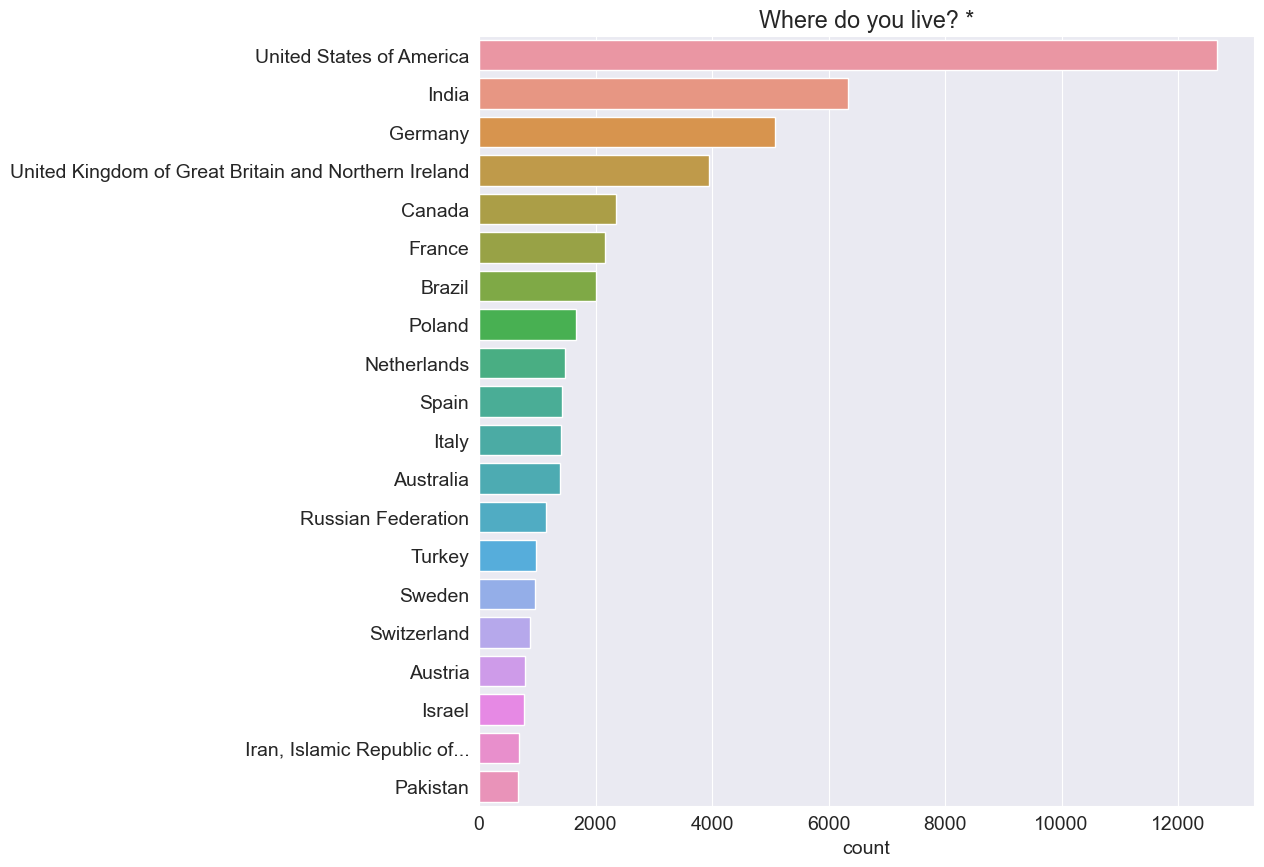

In [55]:
top_countries = survey_df.Country.value_counts().head(20)
plt.figure(figsize=(10,10))
plt.title(schema.Country)
sns.barplot(x=top_countries, y=top_countries.index)
plt.ylabel('');

**We can see that high number of respondents are from the US with over `12000` respondents. India, Germany, Uk and Canada completes the top five countries with the highest number of respondents. Language might have been a factor because the survey was conducted in English and these countries have very high English-speaking population.**

### Age

**The distribution of age of the respondents is an important factor to look at.**

**Age in this survey was presented as age groups or brackets.**

In [56]:
schema.Age

'What is your age?'

In [57]:
age_groups = survey_df.Age.value_counts()

age_groups

Age
25-34 years old       26683
18-24 years old       15555
35-44 years old       13267
45-54 years old        5040
Under 18 years old     3568
55-64 years old        1877
65 years or older       504
Name: count, dtype: int64

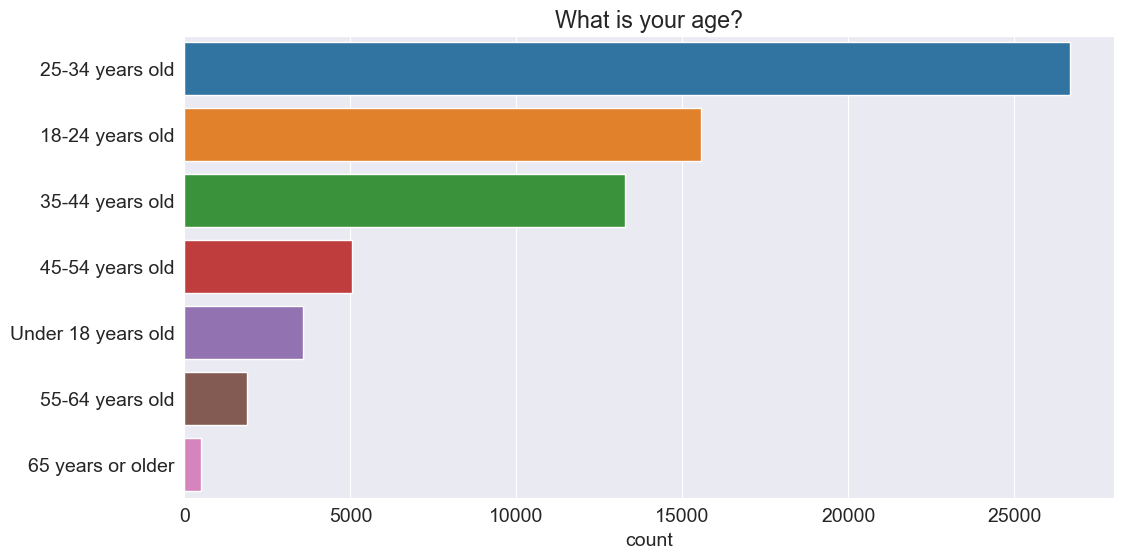

In [58]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
sns.barplot(x=age_groups, y=age_groups.index)
plt.ylabel('');

**In the barchart above, over `26000` respondents are between 25-34 years old. It is followed by 18-24 years old respondents with over `15000` respondents. Programming is more appealing to young people and this is somehow the representation of the programming community in general. This might be because many young people are interested in programming/coding and have taken up computer science as a field of study.**


### Gender

**There is a public notion that women and non-binary genders are underrepresented in the programming community. Let's dig deep in our dataset and investigate.**

**Pie chart will be used for visualization.**

In [59]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [60]:
gender_counts = survey_df.Gender.value_counts()

gender_counts

Gender
Man                                                  62538
Woman                                                 3282
Non-binary, genderqueer, or gender non-conforming      576
Name: count, dtype: int64

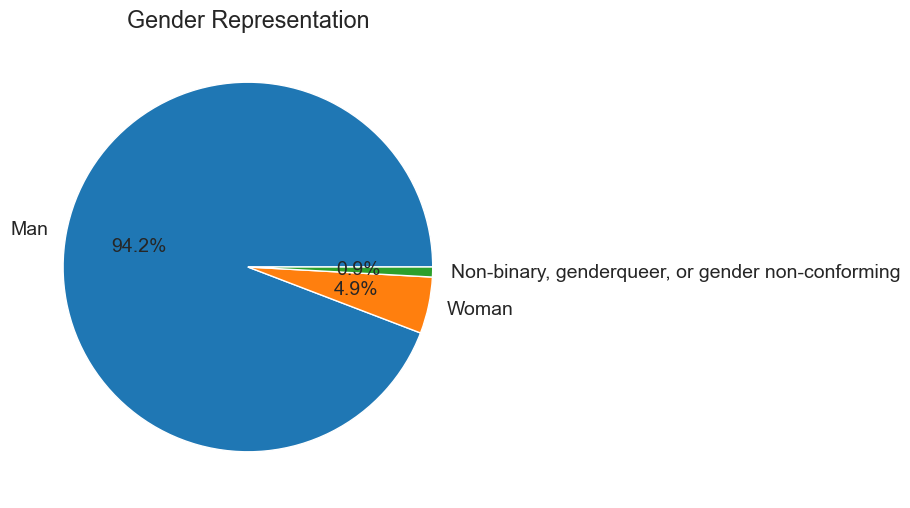

In [61]:
plt.figure(figsize=(12,6))
plt.title('Gender Representation')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=360);

**Only about 5% of respondents indentify as women or non-binary. Women and non-binary should be encouraged to take up computer science as field of study or learn programming from other sources.**

### Education Level

**It is widely perceived that formal education in computer science is an important requirement for becoming a programmer. However in recent times, there are many free online resources and tutorial available to learn programmng. We can compare education levels of respondents to gain more insight.**

In [62]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [63]:
survey_df.EdLevel.value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          28723
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       14679
Some college/university study without earning a degree                                 8624
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7292
Associate degree (A.A., A.S., etc.)                                                    2100
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2051
Primary/elementary school                                                              1610
Something else                                                                         1022
Professional degree (JD, MD, etc.)                                                     1017
Name: count, dtype: int64

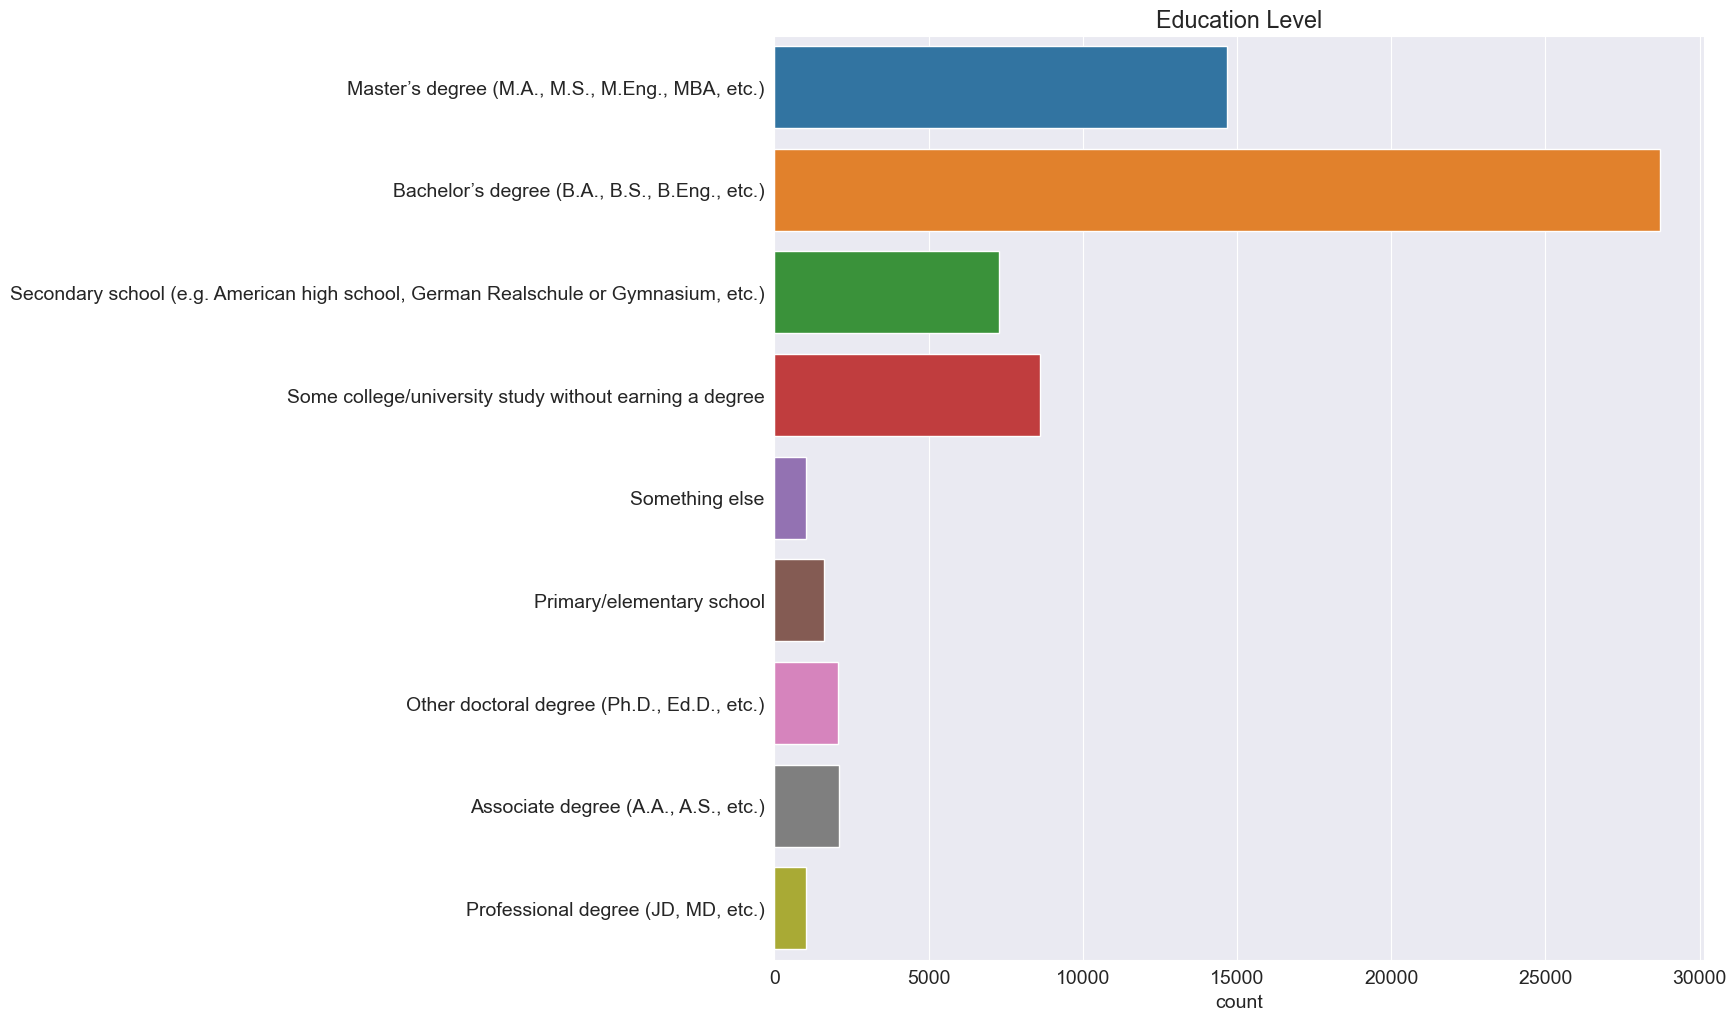

In [64]:
plt.figure(figsize=(12, 12))
plt.title('Education Level')
sns.countplot(y=survey_df.EdLevel)
plt.ylabel('');

**A good number of respondents hold a bachelor's or master's degree which over half of the number of respondents. However, the graph does not show if the degrees are in computer science.**

### Employment

**Frelancing or part time work is a common choice among programers. It would interesting to compare the employment conditions of our respondents.**

In [65]:
schema.Employment

'Which of the following best describes your current employment status?'

In [66]:
survey_df.Employment.value_counts()

Employment
Employed, full-time                                                                                                                                   40709
Student, full-time                                                                                                                                     6320
Independent contractor, freelancer, or self-employed                                                                                                   4531
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3294
Not employed, but looking for work                                                                                                                     1702
                                                                                                                                                      ...  
Student, part-time;Independent contractor, freelancer

**The `Employment` culumn contains information about employment status of respondents. This question allows multiple answers, the column contains lists of values seperated by a semi-column `;`, which makes the column a litle bit hard to analyse directly.**

**`NOTE`: Some columns in `survey_df` data frame are also like this.**

**We'll define a function that turns a column containing lists of values e.g `survey_df.Emploment` into a data frame with one column for each posible option.**

In [67]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [68]:
employment_df = split_multicolumn(survey_df.Employment)

employment_df

,"Employed, full-time","Student, part-time","Not employed, but looking for work","Independent contractor, freelancer, or self-employed","Employed, part-time","Student, full-time","Not employed, and not looking for work",Retired,I prefer not to say
0,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
73263,True,False,False,False,False,False,False,False,False
73264,True,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False
73266,True,False,False,False,False,False,False,False,False


**We should drop the `I prefer not to say` column from the `employment_df` for better analysis.**

In [69]:
employment_df.drop(columns='I prefer not to say', inplace=True)

In [70]:
employment_pct = employment_df.mean().sort_values(ascending=False) * 100

employment_pct

Employed, full-time                                     67.117273
Student, full-time                                      14.767787
Independent contractor, freelancer, or self-employed    14.276871
Employed, part-time                                      5.477815
Student, part-time                                       5.035847
Not employed, but looking for work                       4.520457
Not employed, and not looking for work                   1.572083
Retired                                                  0.486597
dtype: float64

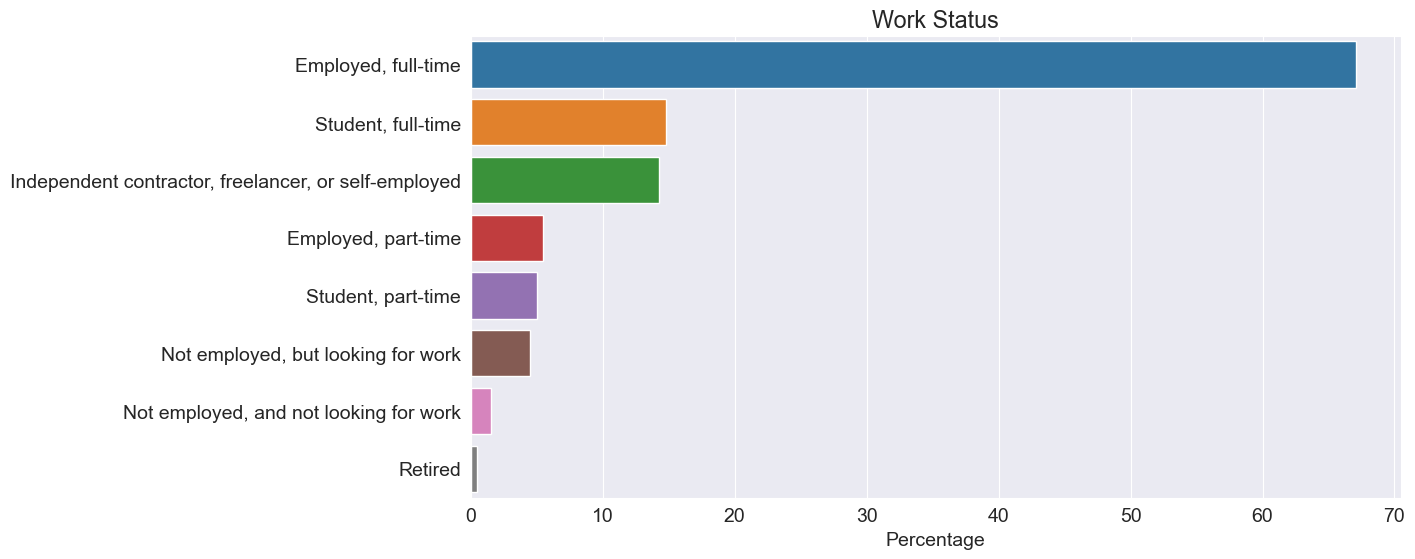

In [71]:
plt.figure(figsize=(12,6))
plt.title('Work Status')
sns.barplot(x=employment_pct, y=employment_pct.index)
plt.xlabel('Percentage');

**About 15% of respondents are freelancers.**

### RemoteWork

**The Corona Virus pandemic impacted our lives in ways we are yet to comprehend. It also impacted on how work is done in most organization worldwide. We'll dive deep to see if the respondents are working working remotely or not.**

In [72]:
schema.RemoteWork

'Which best describes your current work situation?'

In [73]:
remote_work_counts = survey_df.RemoteWork.value_counts()

remote_work_counts

RemoteWork
Fully remote                            23875
Hybrid (some remote, some in-person)    23694
Full in-person                           7980
Name: count, dtype: int64

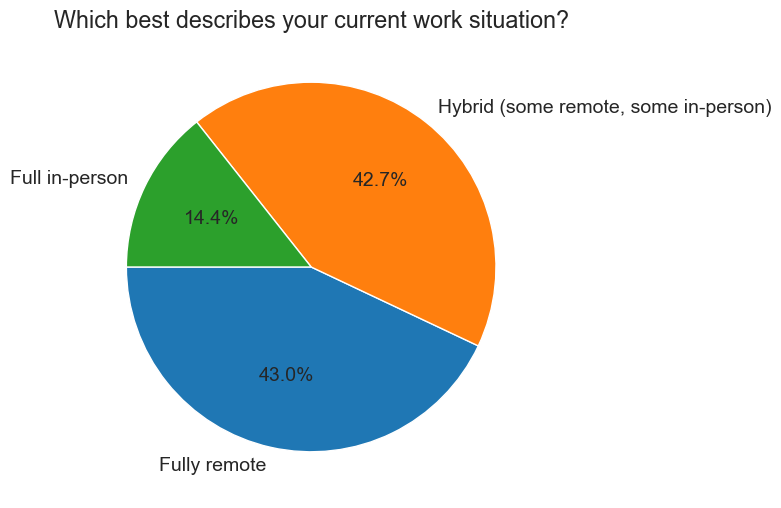

In [74]:
plt.figure(figsize=(12,6))
plt.title(schema.RemoteWork)
plt.pie(remote_work_counts, labels=remote_work_counts.index, autopct='%1.1f%%', startangle=180);

**From the pie chart above, we can see that most respondents work fully remotely with 43.0% while 42.7% of the respondents work in a hybrid condition (some remote, some in-person).**

**It is safe to say that programming work in general can be done from anywhere.**


### DevType

**It have information of the respectively roles held by the respondents.** 

In [75]:
schema.DevType

'Which of the following describes your current job? Please select all that apply.'

In [76]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  6765
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5056
Developer, front-end                                                                                                                    

**The column is also similar to the `Employment` column. We'll use our already defined `split_multicolumn`function to aid us in analyzing this column.**

In [77]:
devtype_df = split_multicolumn(survey_df.DevType)

devtype_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",...,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
73266,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**The `devtype_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.**

**We can now use the column-wise totals to identify the most common roles.**

In [78]:
devtype_df.sum().sort_values(ascending=False)

Developer, full-stack                            26992
Developer, back-end                              25063
Developer, front-end                             14875
Developer, desktop or enterprise applications     8944
Developer, mobile                                 7135
DevOps specialist                                 5789
Student                                           5180
Cloud infrastructure engineer                     4963
Database administrator                            4585
System administrator                              4498
Developer, embedded applications or devices       3668
Project manager                                   3604
Designer                                          3430
Engineer, data                                    3365
Engineering manager                               3365
Data scientist or machine learning specialist     3206
Data or business analyst                          2974
Developer, QA or test                             2859
Academic r

**We identify an ambiguos column `Other (please specify):` which might affect our data. We should drop it.**

In [79]:
devtype_df.drop(columns='Other (please specify):', inplace=True)

In [80]:
devtype_totals = devtype_df.sum().sort_values(ascending=False)

devtype_totals

Developer, full-stack                            26992
Developer, back-end                              25063
Developer, front-end                             14875
Developer, desktop or enterprise applications     8944
Developer, mobile                                 7135
DevOps specialist                                 5789
Student                                           5180
Cloud infrastructure engineer                     4963
Database administrator                            4585
System administrator                              4498
Developer, embedded applications or devices       3668
Project manager                                   3604
Designer                                          3430
Engineer, data                                    3365
Engineering manager                               3365
Data scientist or machine learning specialist     3206
Data or business analyst                          2974
Developer, QA or test                             2859
Academic r

**Developer, full-stack, back-end and front-end are the most jobs of the respondents.**

## Asking and Answering Questions

**At this point, we have gained so much information about the respondents by exploring individual columns of the dataset.**

**Now we can ask some specific questions and try to answer them using data frame operations and visualizations.**

### Q: What are the most popular programming languages in 2022?

**We can answer this question by using `LanguageHaveWorkedWith` column form the `survey_df`. Similar to `DevType`, respondents were albe to choose multiple options.**

In [81]:
schema.Language

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [82]:
survey_df.LanguageHaveWorkedWith.value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                       1193
Python                                                                892
HTML/CSS;JavaScript                                                   845
HTML/CSS;JavaScript;PHP;SQL                                           692
C#;HTML/CSS;JavaScript;SQL;TypeScript                                 549
                                                                     ... 
C;C++;Clojure;Java;JavaScript;Ruby;Rust                                 1
Groovy;HTML/CSS;Java;JavaScript;Python;Scala;SQL;Swift;TypeScript       1
Bash/Shell;Go;JavaScript;Python;Ruby;Rust                               1
Bash/Shell;C;C++;HTML/CSS;JavaScript;Python;Ruby                        1
C#;JavaScript;Lua;PowerShell;SQL;TypeScript                             1
Name: count, Length: 23689, dtype: int64

**We'll use `split_multicolumn` function to split `LanguageHaveWorkedWith` column into a data frame containing a column of each language listed in the options.**

In [83]:
language_worked_with_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [84]:
language_worked_with_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,PHP,C,...,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,True,True,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
73264,True,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
73266,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [85]:
language_worked_with_total = language_worked_with_df.sum().sort_values(ascending=False)

language_worked_with_total

JavaScript     43508
HTML/CSS       36602
SQL            33062
Python         31942
TypeScript     23316
Java           22095
Bash/Shell     19293
C#             18635
C++            14916
PHP            13708
C              12677
PowerShell      8041
Go              7400
Rust            6116
Kotlin          6073
Dart            4320
Ruby            3990
Assembly        3530
Swift           3265
R               3092
VBA             2927
MATLAB          2719
Lua             2561
Groovy          2202
Delphi          2155
Scala           1695
Objective-C     1564
Perl            1480
Haskell         1422
Elixir          1414
Clojure          983
Julia            980
Solidity         933
LISP             817
F#               663
Fortran          579
Erlang           569
COBOL            403
APL              395
SAS              364
OCaml            363
Crystal          286
dtype: int64

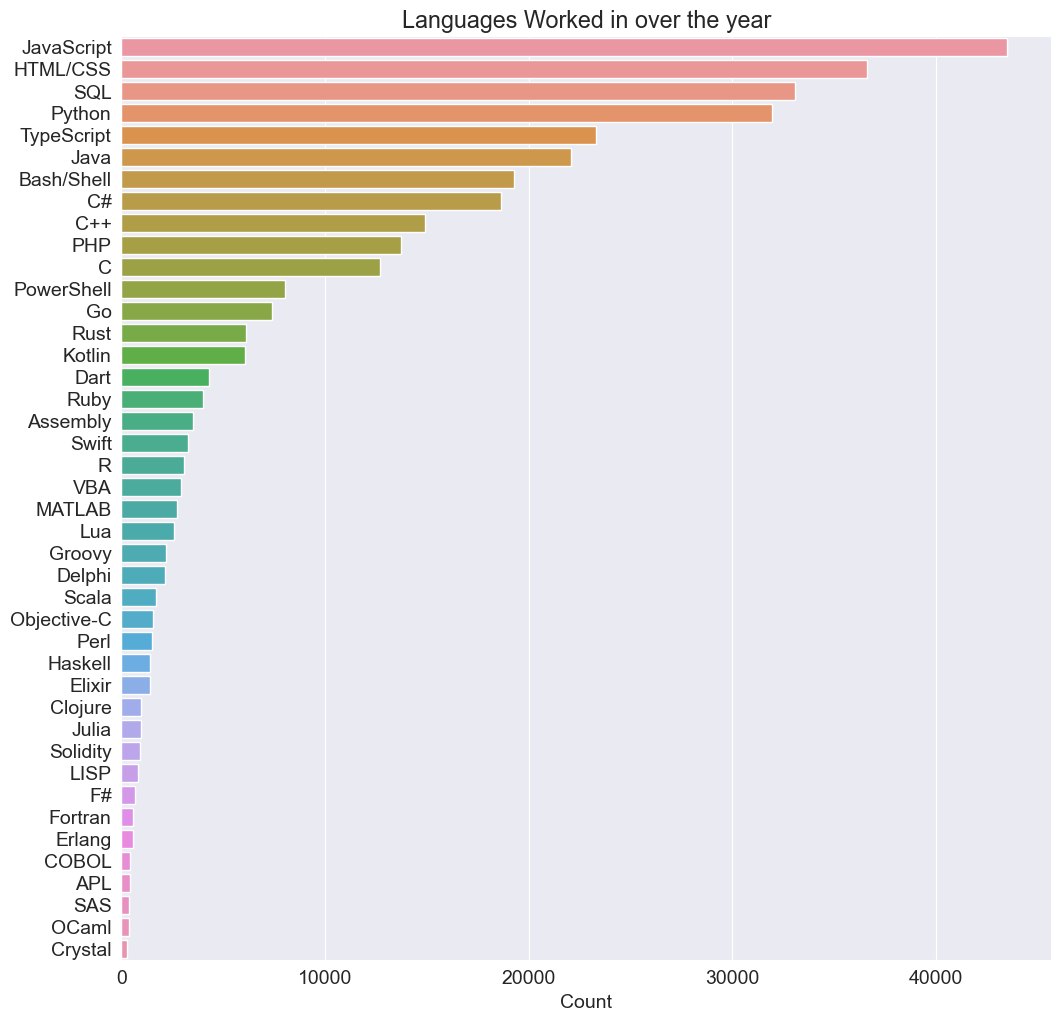

In [87]:
plt.figure(figsize=(12,12))
plt.title('Languages Worked in over the year')
sns.barplot(x=language_worked_with_total, y=language_worked_with_total.index)
plt.xlabel('Count');

**JavaScript, HTML/CSS and SQL are the top three languages our respondents have used or worked in over the year.**

### Q: Which languages are  people interested to work in over the next year?

**The column `LanguageWantToWorkWith` will be used for answering the question.**

In [88]:
schema.Language

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [89]:
language_interested_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
language_interested_pct = language_interested_df.mean().sort_values(ascending=False) * 100
language_interested_pct

JavaScript     42.518211
Python         39.664853
TypeScript     35.318591
HTML/CSS       34.192796
SQL            33.599666
Rust           22.986669
C#             21.138176
Go             21.014368
Java           17.958020
Bash/Shell     17.727678
C++            15.861910
Kotlin         12.506118
C              10.312113
PHP             9.717543
Dart            8.164176
Swift           6.835392
PowerShell      6.315683
Ruby            5.197086
Elixir          4.424002
R               3.905733
Assembly        3.904293
Haskell         3.881259
Solidity        3.470963
Scala           3.265095
Lua             3.089459
Julia           2.928220
F#              2.589905
Clojure         2.566871
Delphi          2.225677
Erlang          1.596556
LISP            1.577841
MATLAB          1.392128
Groovy          1.338862
Perl            1.179062
VBA             1.177622
Objective-C     1.148830
OCaml           0.928565
APL             0.695344
Crystal         0.611845
Fortran         0.535545


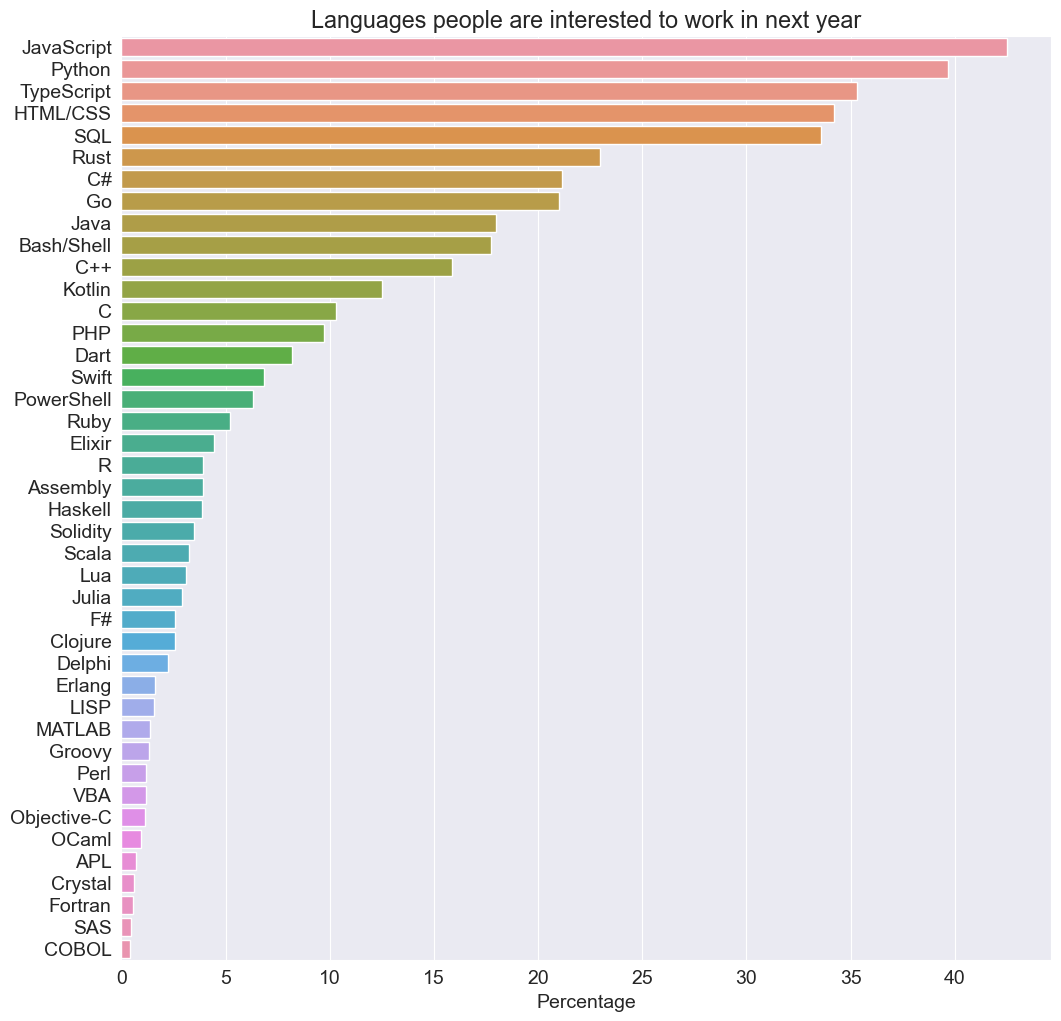

In [90]:
plt.figure(figsize=(12,12))
plt.title('Languages people are interested to work in next year')
plt.xlabel('Percentage')
sns.barplot(x=language_interested_pct, y=language_interested_pct.index);

**JavaScript language comes on top as the language people are also interested working in for the next year, it further shows the important of web dovlopment in recent times. Python is second on the list here, this might because of its wide usage across board and also its simple syntax. It is quite interesting to note that we are using Python for this analysis.**

### Q: How did you learn how to code?

**To answer this question, we'll use the `LearnCode` columns in both schema and survey_df data frames.**

In [91]:
schema.LearnCode

'How did you learn to code? Select all that apply.'

In [92]:
survey_df.LearnCode.value_counts()

LearnCode
School (i.e., University, College, etc)                                                                                                                                                                          3483
Other online resources (e.g., videos, blogs, forum)                                                                                                                                                              3025
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                               2690
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                                                                      2531
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc);On the job training

In [93]:
learn_code_df = split_multicolumn(survey_df.LearnCode)
learn_code_df

,Books / Physical media,Friend or family member,"Other online resources (e.g., videos, blogs, forum)","School (i.e., University, College, etc)",On the job training,Online Courses or Certification,Coding Bootcamp,Colleague,Other (please specify):,Hackathons (virtual or in-person)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
73263,True,False,True,False,True,True,False,False,False,False
73264,False,False,True,True,True,True,False,False,False,False
73265,True,False,True,True,False,True,False,False,False,False
73266,True,False,False,False,True,False,False,False,False,False


In [94]:
learn_code_df.drop(columns=['Other (please specify):'], inplace=True)

In [95]:
learn_code_total = learn_code_df.sum().sort_values(ascending=False)
learn_code_total

Other online resources (e.g., videos, blogs, forum)    47559
School (i.e., University, College, etc)                42066
Books / Physical media                                 36663
Online Courses or Certification                        31424
On the job training                                    26960
Colleague                                              12379
Friend or family member                                 9290
Coding Bootcamp                                         7175
Hackathons (virtual or in-person)                       4923
dtype: int64

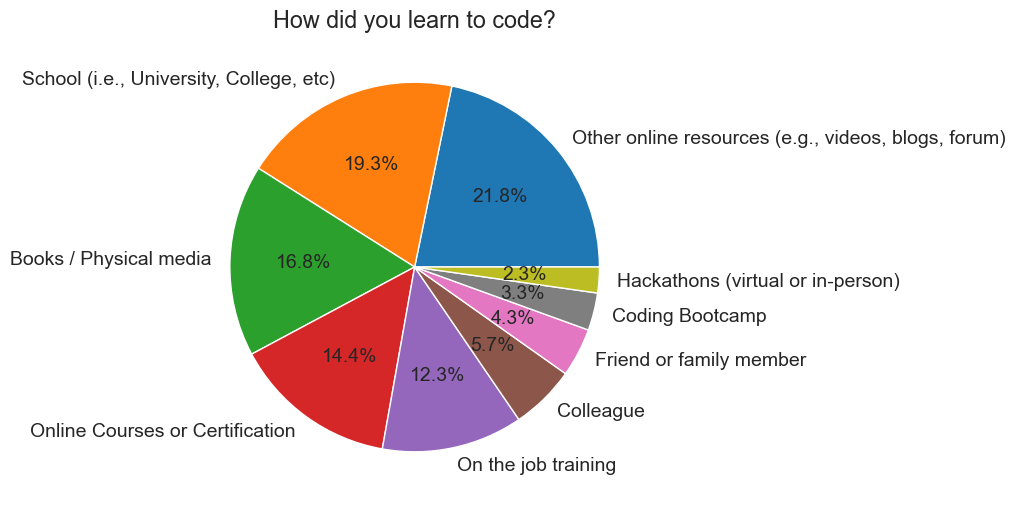

In [96]:
plt.figure(figsize=(12,6))
plt.title('How did you learn to code?')
plt.pie(learn_code_total, labels=learn_code_total.index, autopct='%1.1f%%');

**Over `21`% of respondents learnt programming from online resources such as videos, blogs, forum etc. This further proves that you can learn programming from anything source and not necessarily from a school. However, respondents who learnt programming/coding from school also have a high representation with upto `19.3%`.**

**With `online resources` having a high percentage of people learning coding online, we'll investigate what online resources are commonly used to learn coding.**

### Q: What online resources do you learn to code?

**We'll look at the `LearnCodeOnline` columns in both `schema` and `survey_df` to answer this question.**

In [97]:
schema.LearnCodeOnline

'What online resources do you use to learn to code? Select all that apply.'

In [98]:
learn_code_online_df = split_multicolumn(survey_df.LearnCodeOnline)
learn_code_online_df.drop(columns='Other (Please specify):', inplace=True)
learn_code_online_pct = learn_code_online_df.mean().sort_values(ascending=False) * 100
learn_code_online_pct

Technical documentation                                        60.273243
Stack Overflow                                                 58.971812
Blogs                                                          51.646944
How-to videos                                                  41.042584
Written Tutorials                                              39.659094
Video-based Online Courses                                     35.312833
Online books                                                   29.970343
Online forum                                                   27.469696
Written-based Online Courses                                   23.454551
Coding sessions (live or recorded)                             19.751807
Interactive tutorial                                           17.906193
Online challenges (e.g., daily or weekly coding challenges)    17.146065
Certification videos                                           10.194063
Programming Games                                  

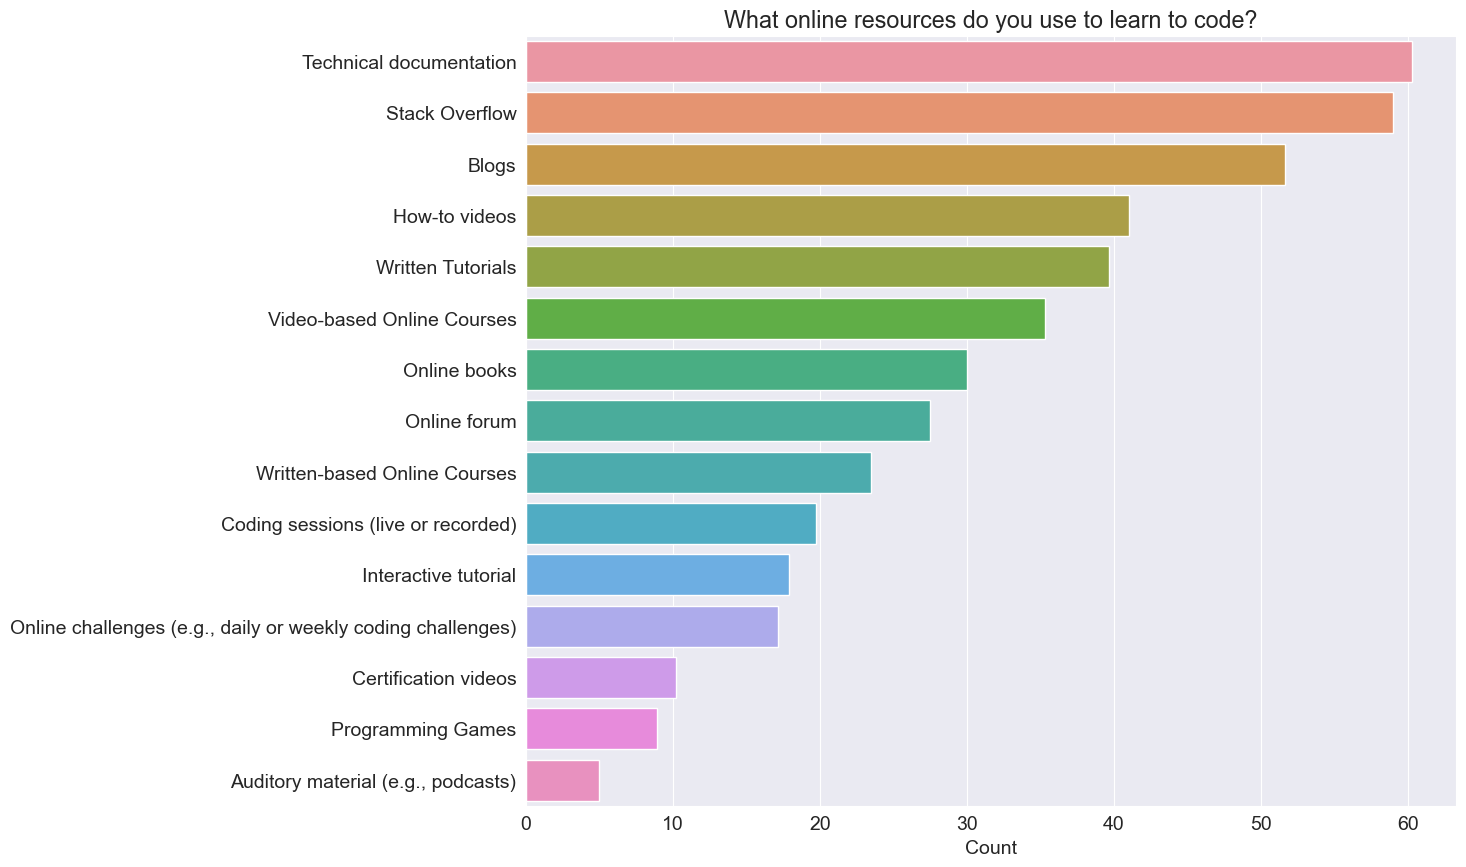

In [101]:
plt.figure(figsize=(12,10))
plt.title('What online resources do you use to learn to code?')
sns.barplot(x=learn_code_online_pct, y=learn_code_online_pct.index)
plt.xlabel('Count');

**Technical documentation, Stack Overflow, Blogs, How-to videos and Written Tutorials are top five online resources people use to learn coding. Techinal documentation is a documentation that describes how a product or service work. [DOCUMENT360](https://document360.com.com/blog/technical-documentation/). Stack Overflow is a community-based space to find and contribute answers to technical challenges, and one of the most popular websites in the world. [stackoverflow](https://stackoverflow.com/#:~:text=A%20public%20platform%20building%20the,popular%20websites%20in%20the%20%20world.). We are using a survey data from `Stack Overflow` for our analysis.** 

**Some of these online resources are free others are not.**

### Q: What online courses or certifications do you use to learn code to code?

**We'll use `LearnCodeCoursesCert` columns in both the `schema` and `survey_df` data frames to answer the question.**

In [99]:
schema.LearnCodeCoursesCert

'What online courses or certifications do you use to learn to code? Select all that apply.'

In [100]:
courses_cert_df = split_multicolumn(survey_df.LearnCodeCoursesCert)
courses_cert_df.drop(columns='Other', inplace=True)
courses_cert_pct = courses_cert_df.mean().sort_values(ascending=False) * 100
courses_cert_pct

Udemy          26.628948
Coursera       13.993263
Codecademy     10.386974
Pluralsight     9.053871
edX             6.168841
Udacity         5.424549
Skillsoft       0.712620
dtype: float64

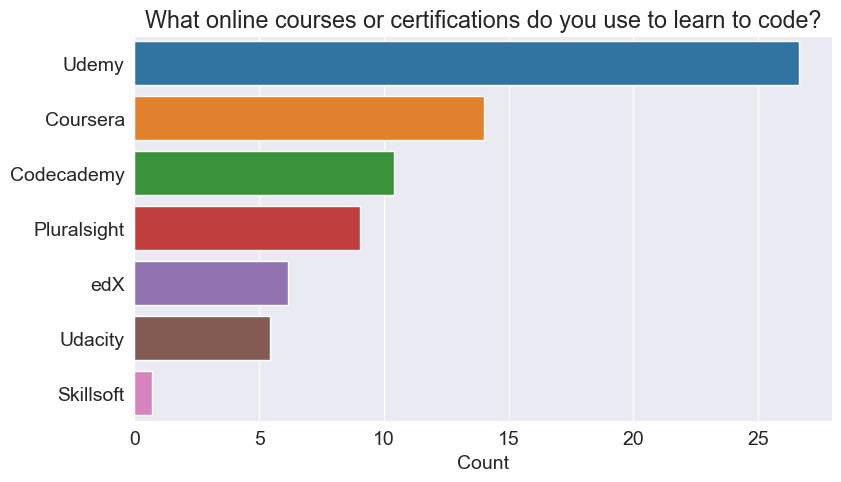

In [102]:
plt.title('What online courses or certifications do you use to learn to code?')
sns.barplot(x=courses_cert_pct, y=courses_cert_pct.index)
plt.xlabel('Count');

**Courses are well planned and structured form of learning where an individual can acquire a new skill or improve their knowlegde of an already gained skill or subject matter. It can be free or not. From the above bar graph, we can see different platforms that offer online courses.**

**Udemy is the top online platform where our respondents use for learning how to code with over `26%`. Cousera and Codecademy completes the top three most used online platforms for learning coding.**


### Q: What are the top ten countries to earn the most?

**We'll use the `.groupby` to group the survey by country.**

In [103]:
schema.CompTotal

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [104]:
top_earning_countries_df = survey_df.groupby('Country')[['CompTotal']].mean().sort_values('CompTotal', 
                                                                                          ascending=False).head(10)

In [105]:
top_earning_countries_df

,CompTotal
Country,
United States of America,1.196602e+18
Italy,1.355014e+12
Nigeria,1.239910e+10
"Iran, Islamic Republic of...",2.229974e+08
Indonesia,5.380211e+07
South Korea,5.258312e+07
Viet Nam,4.962972e+07
Republic of Korea,3.595151e+07
Cambodia,2.469482e+07


In [162]:
print('Top ten countries that earn the most are :', list(top_earning_countries_df.index))

Top ten countries that earn the most are : ['United States of America', 'Italy', 'Nigeria', 'Iran, Islamic Republic of...', 'Indonesia', 'South Korea', 'Viet Nam', 'Republic of Korea', 'Cambodia', 'Paraguay']


**We have some suprises in our result, most countries in our result are often considered as under-developed or developing nations e.g Nigeria, Paraguay, VietNam etc are among the top countries that earn the most. We can investigate that in a letter anaysis.**

### Q. When do you receive your salary or payment or compensation?

In [106]:
schema.CompFreq

'Is that compensation weekly, monthly, or yearly?'

In [107]:
compensation_type_counts = survey_df.CompFreq.value_counts()
compensation_type_counts

CompFreq
Yearly     22381
Monthly    18500
Weekly       913
Name: count, dtype: int64

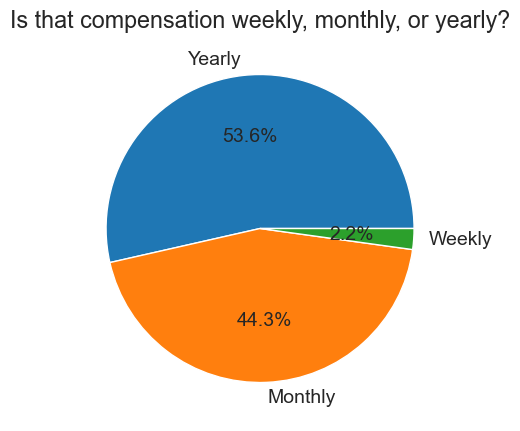

In [108]:
plt.title(schema.CompFreq)
plt.pie(compensation_type_counts, labels=compensation_type_counts.index, autopct='%1.1f%%');

**According to the respondents, yearly renumeration is the highest with `53.6%` followed by monthly renumeration with `44.3%` while weekly renumeration is the least with `2.2%`.**

### Q. What age group indentify as Trans the most?

**We'll use the `groupby` function to solve the above question.**

In [137]:
trans_age_total = survey_df[survey_df['Trans'] == 'Yes'].groupby('Age').size().sort_values(ascending=False)
trans_age_total

Age
18-24 years old       288
25-34 years old       278
Under 18 years old    129
35-44 years old        89
45-54 years old        28
55-64 years old         7
65 years or older       5
dtype: int64

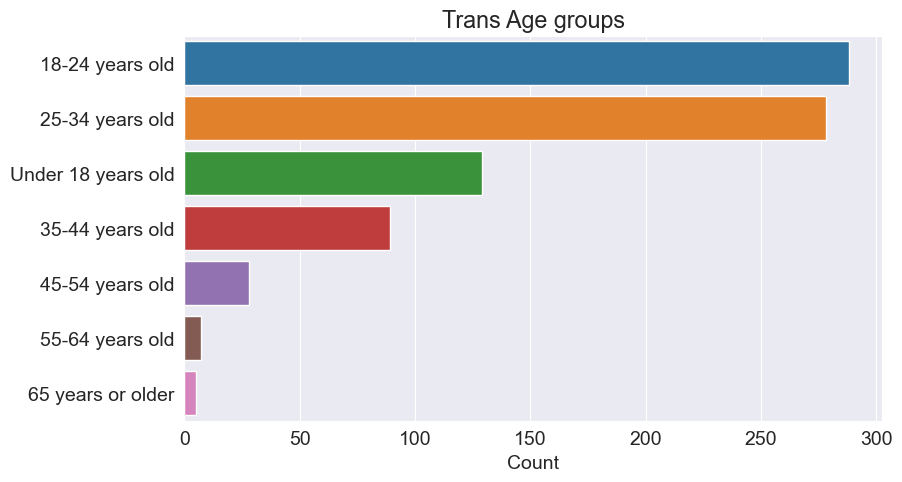

In [138]:
plt.title('Trans Age groups')
sns.barplot(x=trans_age_total, y=trans_age_total.index)
plt.xlabel('Count')
plt.ylabel('');

**Age groups of `18-24 years old` and `25-34 years old` have the highest number of `Trans`.**

## Inferences and Conclusions

**From our analysis above, we have standout inferences about the survey. They includes:**

- **The demographics of the survey is like the global representation of the programming community. In the future, the survey should be carried out in different languages so as to encourage more responses from many differnt countries especially non-English countries.**

- **The male gender is a dominant force in the programming community. Female and non-binary genders should be encourage to go into programming and rise to the challenge.**

- **The trans group are also underrepresented in the programming community.**

- **Basic education seem to be enough for one to break into programming community.**

- **Most of the programmers work full time while other work part-time or freelancers. A good number are also students.**

- **There seem to be a between programmers that work fully remotely and programmers who work in a hybrid condition i.e remote and in-full. It shows remote work is here to stay with us and one can work remotely from anywhere in the world.**

- **JavaScipt & HTML/CSS are the most used programming languages in 2022, SQL and Python follows them closely behind.**

- **Alot of people learnt coding from online resources, it shows that one can learning prgramming online. Traditional school like universities, colleges also have a high number of people learning coding from them.**

- **Udemy and Coursera are the top online certification platforms where people learning programming.**

- **USA, Italy and Nigeria are the countries with the highest earnings in terms of renumeration.**

- **Age groups of `18-24 years old` and `25-34 years old` have the highest number of `Trans`.**


## References and Future Work

**Here are the resources used in this notebook:**

- **Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey**
- **Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html**
- **Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html**
- **Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html**

**You can ivestigate the following:**

- **Why Nigeria is among the top countries with highest earnings.**
- **What countries have the highest number of responses relating to data science.**
- **Compare this anaysis with the previous years and indentify interesting trends.**